In [2]:
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
ds=pd.DataFrame(boston.data,columns=boston.feature_names)
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
ds=pd.get_dummies(ds,prefix="RAD")
ds.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler();
scaler=scaler.fit(ds)

scaledData=scaler.transform(ds)

#now create the scaled dataframe from it
dss=pd.DataFrame(scaledData,columns=ds.columns)

In [6]:
#now perform the clusetring 
#step 1  cluster configuration to kind the k
#step 2 using the value of 'k', generate the cluster
from sklearn.cluster import KMeans
from itertools import combinations_with_replacement

from itertools import combinations 
from scipy.spatial import distance
print(list(combinations_with_replacement("ABCD", 2)))

wss=[]
bss=[]
pairmap={}
dis=[]
d=0
distanceMap={}
for k in range(2,16):
    clust=KMeans(n_clusters=k,random_state=0).fit(dss)
    wss.append(clust.inertia_)
    c=list(combinations(range(0,k), 2))
    print("Combinations ----------->",c)
    print("ClusterCenters Are Below----------->")
    dataFrameClusterCenter=pd.DataFrame(clust.cluster_centers_)
    print(pd.DataFrame(clust.cluster_centers_))
    print("The above are clusterCenters are for k==",k)
    pairmap[k]={"pairs":c}
    for i in c:
        #converting the tuple() to list using the list() method
        pair=list(i)
        print("pair is",pair)
        #extracting the index from the pair
        index1=pair[0]
        index2=pair[1]
        print("distance",d)
        #appending the calculated distance between each pair of the cluster centers in a list
        dis.append(d)  
        distanceMap[k]={"distance":dis}
    #making the list empty for next k
    dis=[]
        
print("disstacne map for each k ")
print(distanceMap)   
print("wss for all k ")
print(wss)     
        


[('A', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'C'), ('C', 'D'), ('D', 'D')]
Combinations -----------> [(0, 1)]
ClusterCenters Are Below----------->
         0             1         2         3         4         5         6   \
0  0.003161  1.701183e-01  0.250547  0.068047  0.215780  0.551908  0.560543   
1  0.115086  2.359224e-16  0.674716  0.071429  0.617529  0.461434  0.909384   

         7         8         9         10        11        12  
0  0.323551  0.149987  0.219590  0.553821  0.969275  0.218630  
1  0.079076  0.817805  0.829857  0.761968  0.756312  0.467953  
The above are clusterCenters are for k== 2
pair is [0, 1]
distance 0
Combinations -----------> [(0, 1), (0, 2), (1, 2)]
ClusterCenters Are Below----------->
         0             1         2         3         4         5         6   \
0  0.007364  1.947090e-02  0.405181  0.111111  0.390108  0.517159  0.830791   
1  0.137348  2.220446e-16  0.659524  0.058394  0.586630  0.468

Combinations -----------> [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]
ClusterCenters Are Below----------->
         0             1         2             3         4         5   \
0  0.005054  1.526557e-16  0.519353  0.000000e+00  0.375303  0.469580   
1  0.134542  1.804112e-16  0.646628 -4.163336e-17  0.587853  0.457369   
2  0.002878  6.158537e-02  0.199154 -2.775558e-17  0.283898  0.600874   
3  0.000383  7.125000e-01  0.083272  1.851852e-02  0.061469  0.614361   
4  0.180444 -4.163336e-17  0.646628  1.387779e-17  0.579894  0.481893   
5  0.001804  1.049569e-01  0.235293 -9.714451e-17  0.156125  0.518031   
6  0.024020  1.387779e-17  0.700880 -2.775558e-17  0.738236  0.463915   
7  0.064849  0.000000e+00  0.646628  1.000000e+00  0.681070  0.5

Combinations -----------> [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (8, 9), (8, 10), (8, 11), (8, 12), (9, 10), (9, 11), (9, 12), (10, 11), (10, 12), (11, 12)]
ClusterCenters Are Below----------->
          0             1         2             3         4         5   \
0   0.230582 -2.775558e-17  0.646628  1.387779e-17  0.610022  0.390045   
1   0.000383  7.125000e-01  0.083272  1.851852e-02  0.061469  0.614361   
2   0.011472  1.043103e-01  0.382900 -1.387779e-17  0.

Combinations -----------> [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14)]
ClusterCenters Are Below----------->
          0             1 

In [9]:
import math
for i in range(2,16):
    value=distanceMap.get(i)
    print(value)
    list=value['distance']
    print(math.fsum(list))
    summedDistance=math.fsum(list)
    bss.append(summedDistance)
    
bss
#1. now we have bss for all the k 
bss
#2. now we have wss for all the k
wss
#but wss shal be sqrt(wss[i])
len(wss)
len(bss)
sqrtwss=[]
for i in range(0,len(wss)):
    sqrt=math.sqrt(wss[i])
    print(sqrt)
    sqrtwss.append(sqrt)
ratio=[]
for i in range(0,len(sqrtwss)):
    ratio.append(sqrtwss[i]/wss[i])
    #ratio.append(sqrtwss[i]/bss[i])
    
    #So finally perforimg scatter plot of ratio vs k plot
#########################   ratio=(sqrtwss/bss) vs k plot ############################
ratio
del list
k=range(2,16)
k
k=list(k)
k
from matplotlib import pyplot as plt
plt.plot(k,ratio)
plt.xlabel("No of cluster k")
plt.ylabel("Ratio of sqrtwss/bss")
plt.show()


{'distance': [0]}
0.0
{'distance': [0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
0.0
{'distance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

<Figure size 640x480 with 1 Axes>

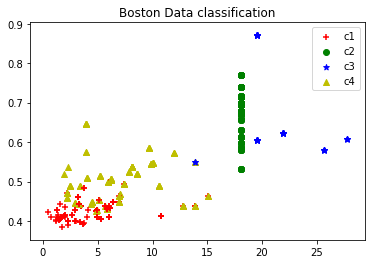

In [15]:


#our scaled dataset is represented by dss
dss.shape
#to find corelation matrix 
dss.corr()
#now performing the clustering
clust=KMeans(n_clusters=4,max_iter=500,random_state=0).fit(dss)

#now extract the clusterCenters
clusterCenter=clust.cluster_centers_

#convert clusterCenter to dataframe to do the cluster profilin
ccd=pd.DataFrame(clusterCenter,columns=dss.columns)

#ccd for cluster profilin
ccd
#so profiling details
#clusterId 1 is having the highest crime rate
# industry are more in clusterId 1              


#to see the labels i.e clusterId for each observation
labels=clust.labels_
#total labes;
len(labels)
clusterIds=list(labels)

#now perform the inverse Scaling
originalDataAsNumpy=scaler.inverse_transform(dss)
#converting numpy to dataset
originalDataset=pd.DataFrame(originalDataAsNumpy,columns=dss.columns)

#adding the labelled column to the originalDataset
originalDataset["Label"]=labels

#saving data on the system as OriginalData.csv
originalDataset.to_csv(r"C:\Users\rs960\Downloads\results\yoursystem_path")
#to see whether data contains the label or not
originalDataset.Label[0]

##### Now plotting the Classfication 
import pylab as pl
len=originalDataset.shape[0]
len
for i in range(0, len):
    if originalDataset.Label[i] == 0:
            c1 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='r', marker='+')
    elif originalDataset.Label[i]  == 1:
            c2 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='g',marker='o')
    elif originalDataset.Label[i]  == 2:
            c3 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='b',marker='*')
    elif originalDataset.Label[i] == 3:
              c4 = pl.scatter(originalDataset.iloc[i,2],originalDataset.iloc[i,4],c='y',marker='^')
pl.legend([c1, c2, c3,c4], ['c1','c2','c3','c4'])  
pl.title('Boston Data classification')
pl.show()
